In [1]:
import ps, ps_utils
import numpy as np
import pandas as pd
import datetime as dt
ps_utils.switch_to_dev()
import matplotlib.pyplot as plt 
algo_id = 'a80eb149d63a5ba1a8286909ec0cf1309d0d91c3'


import math

def Norm(x):
    return (1+math.erf(x/math.sqrt(2.0)))/2.0
def NDist(x):
    return math.exp(-x*x/2.0)/math.sqrt(2.0*math.pi)
def BachelierC(F,K,sigma_n,Time):
    res = 0.0
    dn = (F-K)/(sigma_n*math.sqrt(Time))
    res = (F-K)*Norm(dn) + sigma_n*math.sqrt(Time)*NDist(dn)
    return res

def BachelierRho(F,K,sigma_n,Time):    
    dn = (F-K)/(sigma_n*math.sqrt(Time))    
    return Norm(dn)   

[ERROR] 2023-07-03 17:48:56,349 - You do not have xbbg installed, some functionality will not be available
[INFO] 2023-07-03 17:48:59,815 - ps client switched from prod_pvlss to dev


In [2]:
price_dt = dt.date(2022, 12, 6)
mdsInitial= ps_utils.market.get_mds(price_dt)


In [3]:
start_dt = ps_utils.get_dates_from_shifters(price_dt,'30D','MWB','Actual')
end_dt = ps_utils.get_dates_from_shifters(price_dt,'3Y','MWB','Actual')
#baseDates=ps_utils.get_schedule(start_dt,end_dt,'1M','MWB','ModifiedFollowing')
baseDates=ps_utils.get_schedule(start_dt,end_dt,'30D','MWB','Actual')
shiftedBaseDates = [ps_utils.get_dates_from_shifters(i,'1D','MWB','Actual') for i in baseDates]



# set custom implied vol

In [4]:

vols2 =[[0.038519535,0.035844586,0.033009609,0.030597826,0.029966087,0.030126555,0.031497598,0.034058464,0.037118929,0.040408414,0.043817721,0.047266896,0.050710043,0.054117999,0.057457984,0.060692434,0.063718273,0.066301559,0.068692906,0.071003596,0.073241423,0.075412873,0.077523524,0.079578215,0.081581172,0.083536118,0.087314797,0.090936596,0.094419571,0.102611073,0.110195323,0.117290179,0.123979688],
        [0.032922336,0.031409391,0.030029387,0.029299913,0.029439011,0.030138177,0.031492918,0.03345355,0.035730519,0.038130677,0.040624074,0.043177502,0.04575915,0.048351194,0.05093966,0.053512575,0.056060871,0.058570833,0.061020446,0.06339915,0.065671477,0.067697179,0.069471631,0.071153877,0.072797017,0.074403878,0.07751774,0.080511259,0.083397397,0.090209662,0.096542427,0.102484621,0.10810067],
        [0.030409606,0.029499177,0.028848471,0.028869655,0.029334892,0.030230545,0.031570359,0.033301562,0.035256306,0.037301642,0.039410827,0.041571573,0.043764378,0.045973949,0.048191352,0.050408795,0.052618487,0.05481372,0.056988554,0.059132253,0.061229373,0.063271201,0.065251433,0.067107595,0.068746809,0.07020609,0.07296091,0.075614976,0.078178991,0.084248323,0.089908872,0.095233558,0.100275899],
        [0.0272012,0.027139506,0.02729645,0.027886167,0.028439988,0.029222279,0.030236884,0.031463879,0.032873927,0.034407508,0.036005448,0.03763288,0.03928445,0.040957594,0.042647528,0.044348432,0.046055521,0.047765633,0.049476279,0.051184767,0.052887864,0.054582626,0.056266069,0.057935284,0.059586755,0.061213341,0.064364291,0.067356424,0.070041371,0.075087165,0.079656636,0.083977836,0.088087311],
        [0.025582468,0.025982523,0.026616686,0.027664916,0.028409598,0.029317685,0.030372918,0.031556773,0.032847829,0.034213684,0.035623535,0.037053066,0.038494825,0.039947723,0.041410738,0.042881682,0.044357717,0.045836355,0.047315645,0.048794165,0.050270677,0.051743792,0.053211589,0.054672258,0.056124083,0.057565118,0.060407232,0.063173318,0.065827923,0.071711586,0.075756702,0.079436003,0.08295227],
        [0.024496861,0.025140637,0.025998731,0.027194405,0.02796559,0.028863133,0.02987193,0.030975293,0.032157638,0.033400575,0.034684253,0.035991336,0.037308276,0.038631259,0.039959685,0.041293029,0.042630421,0.043970238,0.045310944,0.046651185,0.047989867,0.049326111,0.050659135,0.051988139,0.053311874,0.054629025,0.057238763,0.059806785,0.062320941,0.068217708,0.073148232,0.076509404,0.079609198],
        [0.021053249,0.022094565,0.023379653,0.024869522,0.025684317,0.026544994,0.027450922,0.028399421,0.02938152,0.030387916,0.031410426,0.032442418,0.033480894,0.034524116,0.035570547,0.036618828,0.0376678,0.038716447,0.039763864,0.04080924,0.041851885,0.042891203,0.043926656,0.044957749,0.045983909,0.047004498,0.04902663,0.051018949,0.052974763,0.057659287,0.061904762,0.0654757,0.067625055],
        [0.0220705368,0.0229035896,0.02393166,0.0251235552,0.0257753912,0.0264639328,0.027188675199999998,0.027947474400000002,0.028733153600000002,0.0295382704,0.0303562784,0.031181872,0.0320126528,0.0328472304,0.0336843752,0.034523,0.0353621776,0.0362010952,0.037039028800000005,0.0378753296,0.038709445599999996,0.039540900000000004,0.0403692624,0.041194136799999996,0.0420150648,0.042831535999999996,0.0444492416,0.0460430968,0.047607748,0.051355367199999995,0.0547517472,0.057608497599999996,0.0593279816],
        [0.017237358,0.018765286,0.020452119,0.022222407,0.023126485,0.024040981,0.024964624,0.025896311,0.026834988,0.027778334,0.028723292,0.029667169,0.030607603,0.031542515,0.03247042,0.033391331,0.034305568,0.035213412,0.036115116,0.037010897,0.037900811,0.038784741,0.039662566,0.040534176,0.041399464,0.042258331,0.043956427,0.045627761,0.047271642,0.051253202,0.055030883,0.05856958,0.0618196],
        [0.016656968,0.018377868,0.020252686,0.022161822,0.023119359,0.024076218,0.025030785,0.025981685,0.026927727,0.027867862,0.028801174,0.029726857,0.030644196,0.031552556,0.032451545,0.033341499,0.034222873,0.035096072,0.035961454,0.036819339,0.037669996,0.038513539,0.039350013,0.040179454,0.041001893,0.041817353,0.043427397,0.045009566,0.046563749,0.050324683,0.053898577,0.057266579,0.060404325],
        [0.015635394,0.017391971,0.019326774,0.02132439,0.022327304,0.023325469,0.024314422,0.02529039,0.02625087,0.027196429,0.028128191,0.029047111,0.029954011,0.030849602,0.0317345,0.032609235,0.033474246,0.034329917,0.035176588,0.036014558,0.036844094,0.037665433,0.038478784,0.03928433,0.040082236,0.040872646,0.042431497,0.043961741,0.045463785,0.049096507,0.052552918,0.055826096,0.05890197],
        [0.015550915,0.017262264,0.019241748,0.021336956,0.022389569,0.023430485,0.024450819,0.025443585,0.026408801,0.027350317,0.028271474,0.029175141,0.030063811,0.030939663,0.031804617,0.032659907,0.033505798,0.034342431,0.035169926,0.035988385,0.036797896,0.037598531,0.038390383,0.039173712,0.039948813,0.040715955,0.042227313,0.043709483,0.045163596,0.048678462,0.052023162,0.055196842,0.058192891],
        [0.015188342,0.016714001,0.018692306,0.020863171,0.021960559,0.023042715,0.024096132,0.025110914,0.026088824,0.027035717,0.027956559,0.028855605,0.029736537,0.030602577,0.03145657,0.03230081,0.033135918,0.033961899,0.034778747,0.035586451,0.036384994,0.037174353,0.0379545,0.038725458,0.039487529,0.040241083,0.041723956,0.043176438,0.044600497,0.048042213,0.051318629,0.05443236,0.057382948],
        [0.014047225,0.014955915,0.016552381,0.018582745,0.019672266,0.020776974,0.021877393,0.02295777,0.024005176,0.025013293,0.025986645,0.026930299,0.027848526,0.02874498,0.029622815,0.030484785,0.031333313,0.032170465,0.032997169,0.033813701,0.034620294,0.03541715,0.036204447,0.036982338,0.037750959,0.038510427,0.040002769,0.041461845,0.042889982,0.0463368,0.049619004,0.052743291,0.055713262],
        [0.016470255,0.018522926,0.020699293,0.022847548,0.023878995,0.024876572,0.025844372,0.026785965,0.027704349,0.028602078,0.029481348,0.030344063,0.031191887,0.032026276,0.032848262,0.033658506,0.034457581,0.035245998,0.036024216,0.036792642,0.037551646,0.038301559,0.039042681,0.039775303,0.040499717,0.041216187,0.042626247,0.044007194,0.045360471,0.048629325,0.051742893,0.054707687,0.057526974]]


In [5]:

curve = 'RUB_KEY_RATE'
vol = ps.get(mdsInitial.VolatilitySurfaces[curve])
#volFlat = [[0.04] * len(vol.VolatilityQuotes[0])] * len(vol.VolatilityQuotes)
volTerm=[ [0.03 + 0.005*i] * len(vols2[0]) for i in range(0,len(vols2)) ]
#mdsInitial.VolatilitySurfaces[curve].VolatilityQuotes=volTerm
#mdsInitial.VolatilitySurfaces[curve].VolatilityQuotes=volFlat
mdsInitial.VolatilitySurfaces[curve].VolatilityQuotes=vols2


#mdsInitial.VolatilitySurfaces.RUB_KEY_RATE.VolatilityQuotes = volTerm

#mdsInitial.RatesCurvesBundles[curve].RatesSchedule.Rates = [10. for x in mdsInitial.RatesCurvesBundles[curve].RatesSchedule.Rates]

#mdsInitial.RatesCurvesBundles.RUB_RUONIA_OIS.RatesSchedule.Rates = [0. for i in mdsInitial.RatesCurvesBundles.RUB_RUONIA_OIS.RatesSchedule.Rates]
mdsInitial.GenericScalars.RUB_KEY_RATE.Value = 0.5

mds=ps.put(mdsInitial)

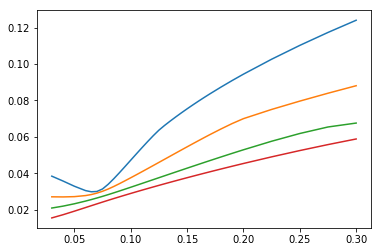

In [6]:

plt.plot(vol.Strikes,vol.VolatilityQuotes[0])
plt.plot(vol.Strikes,vol.VolatilityQuotes[3])
plt.plot(vol.Strikes,vol.VolatilityQuotes[6])
plt.plot(vol.Strikes,vol.VolatilityQuotes[10])
plt.show()

In [7]:
analytic=ps.get('f0b878207357fc837a7071a929f924a4265ce08e')

# single cap

In [8]:
startDate=dt.datetime(2022, 12, 5, 21, 0)
periodStartDate=dt.datetime(2022, 12, 6, 21, 0)
endDate=dt.datetime(2023, 12, 6, 21, 0)
fixDate=dt.datetime(2023, 12, 6, 21, 0)

notional=10000


data = {
    'StartDates':[startDate],
    'PeriodStartDates':[periodStartDate],
    'PeriodEndDates': [endDate],
    'FloatingRateFixingDates': [fixDate],    
    'PaymentDates':[endDate]
}
cap_schedule = pd.DataFrame(data)
#analytic = ps_utils.pricing.CapFloor.create(index='RUB_KEY_RATE', schedule=cap_schedule, strike=0.2, payoff_type='CapForward',mds=mds)
analytic = ps_utils.pricing.CapFloor.create(index='RUB_KEY_RATE', schedule=cap_schedule, strike=0.06, payoff_type='Cap',mds=mds)
analytic.set_product_parameter('Notionals',[notional] )
analytic.set_model_parameter('CalibrationUnderlyings',{'RUB':'RUB_KEY_RATE'})
analytic.set_model_parameter('LocalVolatilityMinimum',0.0000000000001)


analytic.set_calculation_method('AnalyticWithAAD')
analytic.set_request_parameter('NumberOfPaths',2**16)

#analytic.set_model_parameter('LocalVolNumberOfTimeStepsPerYear', 120)
#analytic.set_model_parameter('MonteCarloMaxStepInHours', 24)
analytic.set_model_parameter('LocalVolNumberOfTimeStepsPerYear', 250)
analytic.set_model_parameter('MonteCarloMaxStepInHours', 12)


an=analytic.price(['ProductValue','Rho'],algo_id=algo_id)

[INFO] 2023-07-03 17:49:02,488 - Created a cap/floor request: 773a470723de067b18f7ca964885ccc139f61270
[INFO] 2023-07-03 17:49:02,848 - Compute:18b327040f36c0bedf305c743f90a80ded039b60->e31f30b3ada1380aeaa8544681648ffec2123a05


In [9]:
an.ProductValue

237.58680733105217

In [10]:

cheyette1f = analytic.clone()
cheyette1f.set_model_parameter('TypeName', 'Cheyette1FactorModelMC')
cheyette1f.set_model_parameter('CalibrationFrequencyInDays', 30)
cheyette1f.set_calculation_method('MonteCarloWithAAD')
pcapCh1=cheyette1f.price(['ProductValue'],algo_id=algo_id)
pcapCh1



[INFO] 2023-07-03 17:49:04,346 - Compute:4096a1d904eb0b2de419aa1f7d7f85484e1f5bc9->c52d7a7bdaf6edf31edcb601125a361a7b9a046e


Dict([('ProductValue', 240.18056366251278),
      ('ReportingCurrency', 'RUB'),
      ('StandardError', 1.1485619273053511),
      ('CashToSettleToday', 0.0)])

In [11]:
ps_utils.help('Cheyette1FactorModelMC')

[INFO] 2023-07-03 17:49:10,409 - Help request: 734372ea069ee7c5fca3f2d626f9ab7fd4828a4a


Dict([('Metrics', Dict()),
      ('Requests', Dict()),
      ('Models',
       Dict([('Cheyette1FactorModel',
              ff757933aeb2b4ec9f047076aa1b8976b68abc52)])),
      ('MarketDataTypes', Dict()),
      ('Products', Dict())])

# Bump rho

In [12]:
mds.RatesCurvesBundles[curve].RatesSchedule.Rates = [x + 0.1 for x in mdsInitial.RatesCurvesBundles[curve].RatesSchedule.Rates]

In [13]:
analytic2 = analytic.clone()
analytic2.set_mds(mds)

cheyette1f2=cheyette1f.clone()
cheyette1f2.set_mds(mds)

an2=analytic2.price(['ProductValue'],algo_id=algo_id)
pcapCh2=cheyette1f2.price(['ProductValue'],algo_id=algo_id)

[INFO] 2023-07-03 17:49:11,860 - Compute:920ae46eae14bf4de5d0c3490f35c64c614a0922->b9fcad98b97cc3eedb8a99620e5a59437ed73221
[INFO] 2023-07-03 17:49:12,790 - Compute:720eb3579773482dbbd07d700ac11ff203c30c66->561eaddb764748e443e8e24c8c887e699e85e73c


In [14]:
sum(an.Rho.RUB_KEY_RATE)

7371.106828520786

In [15]:
(an2.ProductValue - an.ProductValue)/0.01

741.8684929427911

In [16]:
(pcapCh2.ProductValue - pcapCh1.ProductValue)/0.01

745.5834469965367

In [17]:
mds.RatesCurvesBundles[curve].RatesSchedule.Rates = [x - 0.1 for x in mdsInitial.RatesCurvesBundles[curve].RatesSchedule.Rates]

In [18]:
analytic3 = analytic.clone()
analytic3.set_mds(mds)

cheyette1f3=cheyette1f.clone()
cheyette1f3.set_mds(mds)

an3=analytic3.price(['ProductValue'],algo_id=algo_id)
pcapCh3=cheyette1f3.price(['ProductValue'],algo_id=algo_id)

[INFO] 2023-07-03 17:49:18,645 - Compute:22f4246abe1ded1b6c20ea9178a7620a25493348->8d066ae7b6b0274989a59aa0c8a28e21ed3a1213
[INFO] 2023-07-03 17:49:19,586 - Compute:afaf99baadc65118f3a49843a7cf569ce0dddf22->9276c1429f18023713adcd091a67f99ab96d19e1


In [19]:
(pcapCh2.ProductValue - pcapCh3.ProductValue )/0.01/2

735.1475643568917

In [20]:
(an2.ProductValue - an3.ProductValue)/0.01/2

737.061801063696